# Assignment 07 , Question :- 01, Clustering

For this assignment im using Hierarchical clustring B'coz following resone
1) Easy to understand 
2) A straightforward approach 
3) An appealing output 
4) Clarity of the bigger picture

 Hierarchical clustering doesn't use any complex methods that are too hard to understand, instead it uses simple methods that can be easily understood by anyone regardless of their familiarity with the topic.

In [1]:
# important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Data Loading

In [2]:
crime_data = pd.read_csv("D:\Data Science Material\Assignments\clustering\crime_data.csv")

In [3]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
# renameing a cols as state
crime_data = crime_data.rename({'Unnamed: 0':'State'},axis = 1)

In [5]:
crime_data.head(1)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2


In [6]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
crime_data.tail(1)

,State,Murder,Assault,UrbanPop,Rape
49,Wyoming,6.8,161,60,15.6


In [8]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
crime_data.shape

(50, 5)

In [10]:
# making original data secure
crime_data_US = crime_data.copy()

In [11]:
crime_data_US.head(1)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2


# Data  Analysis

In [12]:
# shows null values
crime_data_US.isna().sum()    # no null values

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [13]:
crime_data_US.shape

(50, 5)

In [14]:
# show duplicated values
crime_data_US.duplicated()   # no duplicated values

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [15]:
# data types showing 
crime_data_US.dtypes

State        object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [16]:
# sorting the columns by decending order
print(crime_data_US.sort_values('Rape',ascending = False).head())


         State  Murder  Assault  UrbanPop  Rape
27      Nevada    12.2      252        81  46.0
1       Alaska    10.0      263        48  44.5
4   California     9.0      276        91  40.6
5     Colorado     7.9      204        78  38.7
21    Michigan    12.1      255        74  35.1


In [17]:
# sorting the columns by decending order
print(crime_data_US.sort_values('UrbanPop',ascending = False).head())

            State  Murder  Assault  UrbanPop  Rape
4      California     9.0      276        91  40.6
29     New Jersey     7.4      159        89  18.8
38   Rhode Island     3.4      174        87   8.3
31       New York    11.1      254        86  26.1
20  Massachusetts     4.4      149        85  16.3


In [18]:
# sorting the columns by decending order
print(crime_data_US.sort_values('Assault',ascending = False).head())

             State  Murder  Assault  UrbanPop  Rape
32  North Carolina    13.0      337        45  16.1
8          Florida    15.4      335        80  31.9
19        Maryland    11.3      300        67  27.8
2          Arizona     8.1      294        80  31.0
30      New Mexico    11.4      285        70  32.1


In [19]:
# sorting the columns by decending order
print(crime_data_US.sort_values('Murder',ascending = False).head())

             State  Murder  Assault  UrbanPop  Rape
9          Georgia    17.4      211        60  25.8
23     Mississippi    16.1      259        44  17.1
8          Florida    15.4      335        80  31.9
17       Louisiana    15.4      249        66  22.2
39  South Carolina    14.4      279        48  22.5


In [20]:
# sorting the columns by ascending order
print(crime_data_US.sort_values('State',ascending = True).head())

        State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


In [21]:
# mean value of all colums
crime_data_US.mean()

<ipython-input-21-25dbf6f3a47b>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime_data_US.mean()


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [22]:
# median values
crime_data_US.median()

<ipython-input-22-a9df3d3dadfd>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime_data_US.median()


Murder        7.25
Assault     159.00
UrbanPop     66.00
Rape         20.10
dtype: float64

In [23]:
# standard deviation
crime_data_US.std()

<ipython-input-23-c99d0ade1f9c>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime_data_US.std()


Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64

# Visualization

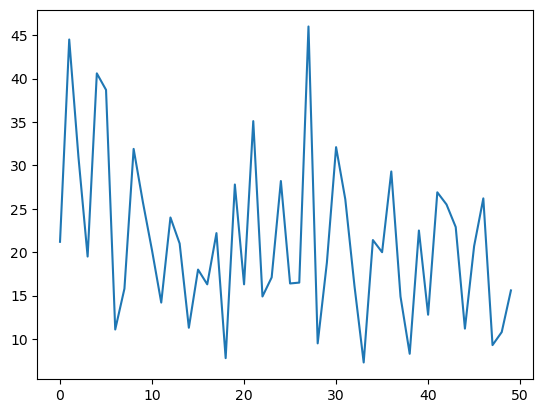

In [24]:
# line plot
plt.plot(crime_data_US.Rape)
plt.show()

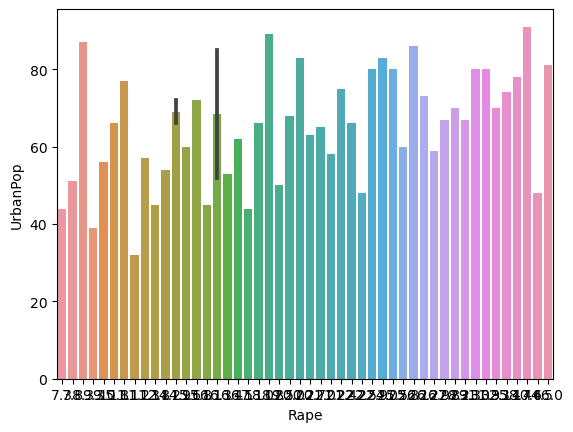

In [25]:
# bar plot
sns.barplot(x = 'Rape',y='UrbanPop', data  = crime_data_US)
plt.show()

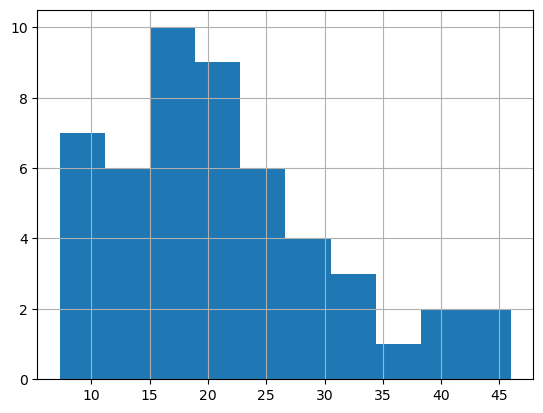

In [26]:
# histogram
crime_data_US.Rape.hist()
plt.show()

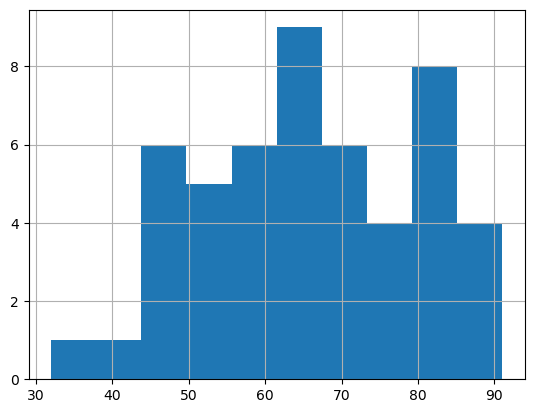

In [27]:
# histogram
crime_data_US.UrbanPop.hist()
plt.show()

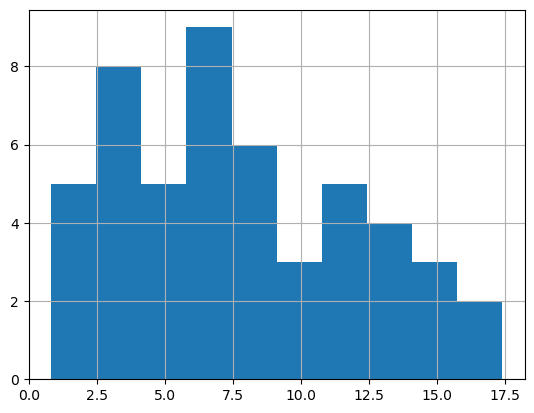

In [28]:
# histogram
crime_data_US.Murder.hist()
plt.show()

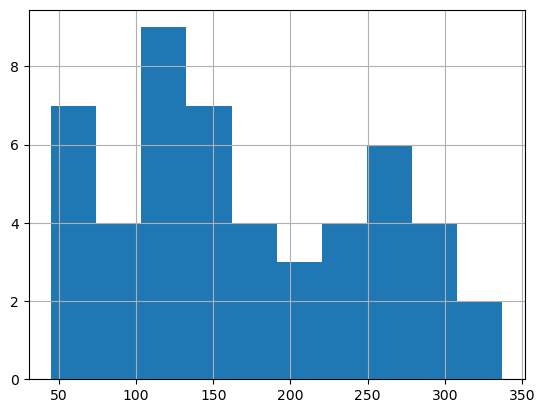

In [29]:
# histogram
crime_data_US.Assault.hist()
plt.show()

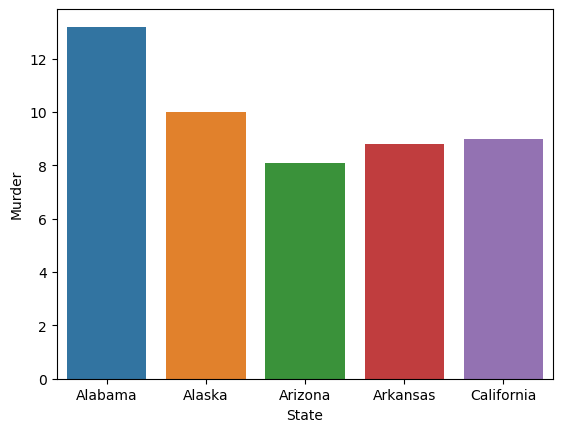

In [30]:
# bar plot
sns.barplot(x = 'State',y = 'Murder',data = crime_data_US.head() )
plt.show()

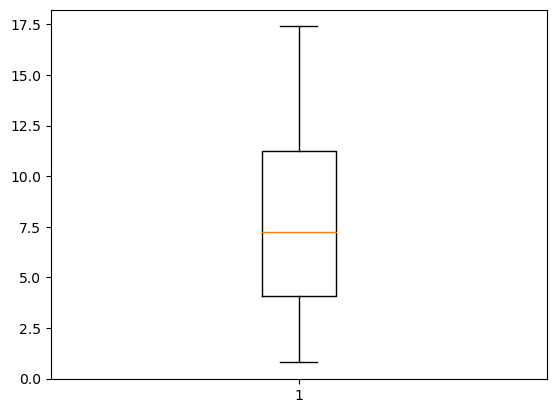

In [31]:
# box plot
plt.boxplot(x = 'Murder', data= crime_data_US)
plt.show()

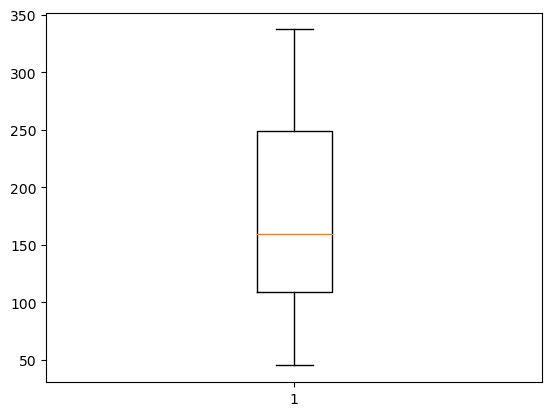

In [32]:
# box plot
plt.boxplot(x = 'Assault', data= crime_data_US)
plt.show()

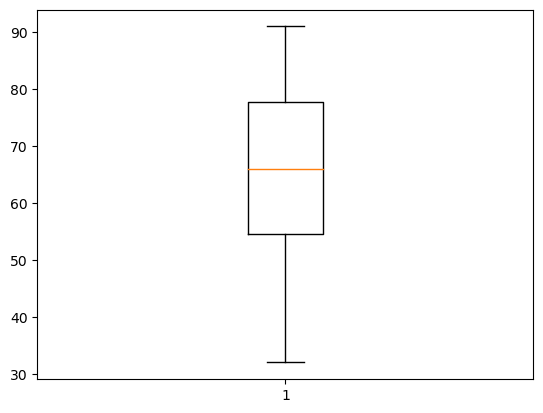

In [33]:
# boxplot
plt.boxplot(x = 'UrbanPop', data= crime_data_US)
plt.show()

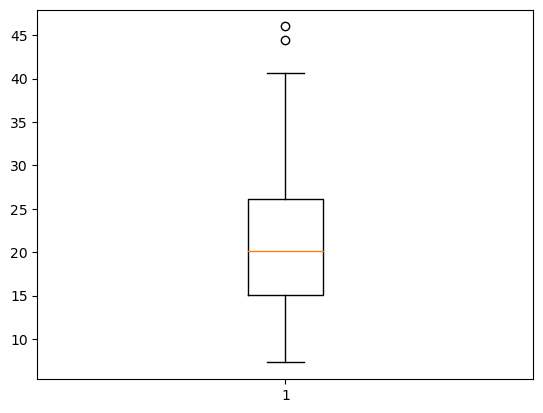

In [34]:
plt.boxplot(x = 'Rape', data= crime_data_US)
plt.show()

In [35]:
#sns.set_style('whitegrid')
#sns.pairplot(crime_data_US,hue='State',height=5)
#plt.show()

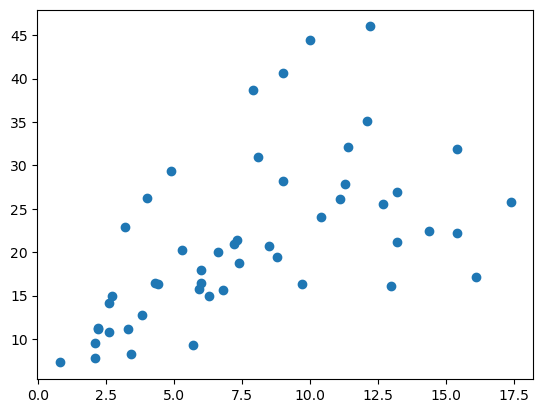

In [36]:
# scatter plot
plt.scatter(x = 'Murder',y = 'Rape',data =crime_data_US )
plt.show()

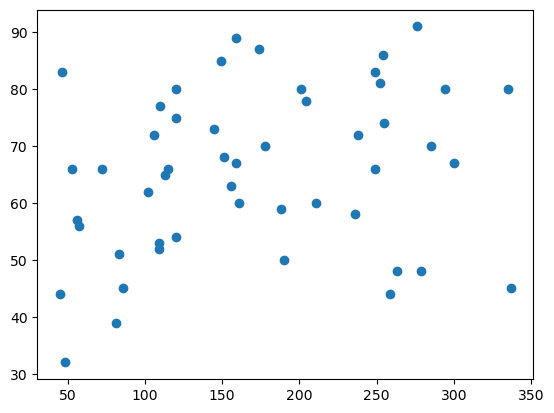

In [37]:
# scatter plot 
plt.scatter(x='Assault',y='UrbanPop',data=crime_data_US)
plt.show()

In [38]:
crime_data_US.head(1)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2


# Data cleaning

In [39]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())   # normalization formula
    return x

In [40]:
# Normalized data set (considering the numerical part of data)
df_norm = norm_func(crime_data_US.iloc[:,1:])

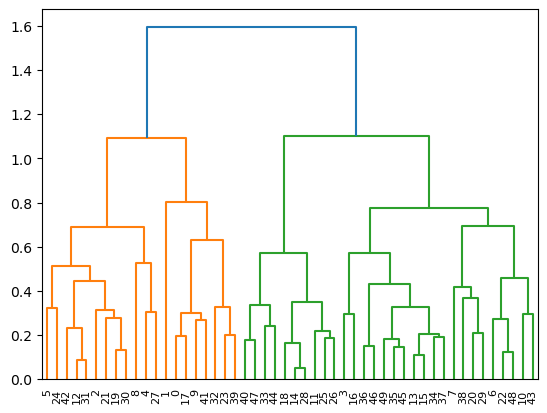

In [41]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm,method='complete'))
plt.show()

In [42]:
# create cluster

hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [43]:
# saving cluster for chart
y_ch = hc.fit_predict(df_norm)
cluster = pd.DataFrame(y_ch,columns=['Cluster'])

In [44]:
crime_data_US['H_cluster'] = hc.labels_


''' U can see below that the how much cluster formed for the crime data in each state in "H_cluster" column '''

In [45]:
crime_data_US

,State,Murder,Assault,UrbanPop,Rape,H_cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
